In [3]:
import requests

In [4]:
print('Téléchargemenet du fichier de status par départements')
request = requests.get('https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7')

with open('/opt/workspace/data/covid_data.csv', 'wb') as file:
    file.write(request.content)

print('Téléchargement terminé')

Téléchargemenet du fichier de status par départements
Téléchargement terminé


In [5]:
print('Téléchargemenet du fichier des départements')
request = requests.get('https://www.data.gouv.fr/fr/datasets/r/70cef74f-70b1-495a-8500-c089229c0254')

with open('/opt/workspace/data/departements.csv', 'wb') as file:
    file.write(request.content)

print('Téléchargement terminé')

Téléchargemenet du fichier des départements
Téléchargement terminé


In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Evolution Covid').master('spark://spark-master:7077')\
.config('spark.executor.memory', '512m').getOrCreate()


In [33]:
departements = spark.read.csv('/opt/workspace/data/departements.csv', header=True)
departements.createOrReplaceTempView('departements')

In [10]:
departements.show()

+----------------+--------------------+-----------+--------------------+
|code_departement|     nom_departement|code_region|          nom_region|
+----------------+--------------------+-----------+--------------------+
|              01|                 Ain|         84|Auvergne-Rhône-Alpes|
|              02|               Aisne|         32|     Hauts-de-France|
|              03|              Allier|         84|Auvergne-Rhône-Alpes|
|              04|Alpes-de-Haute-Pr...|         93|Provence-Alpes-Cô...|
|              05|        Hautes-Alpes|         93|Provence-Alpes-Cô...|
|              06|     Alpes-Maritimes|         93|Provence-Alpes-Cô...|
|              07|             Ardèche|         84|Auvergne-Rhône-Alpes|
|              08|            Ardennes|         44|           Grand Est|
|              09|              Ariège|         76|           Occitanie|
|              10|                Aube|         44|           Grand Est|
|              11|                Aude|         76|

In [15]:
covid_data = spark.read.csv('/opt/workspace/data/covid_data.csv', header=True, sep=";")

In [16]:
covid_data.show()

+---+----+----------+----+---+---+---+
|dep|sexe|      jour|hosp|rea|rad| dc|
+---+----+----------+----+---+---+---+
| 01|   0|2020-03-18|   2|  0|  1|  0|
| 01|   1|2020-03-18|   1|  0|  1|  0|
| 01|   2|2020-03-18|   1|  0|  0|  0|
| 02|   0|2020-03-18|  41| 10| 18| 11|
| 02|   1|2020-03-18|  19|  4| 11|  6|
| 02|   2|2020-03-18|  22|  6|  7|  5|
| 03|   0|2020-03-18|   4|  0|  1|  0|
| 03|   1|2020-03-18|   1|  0|  0|  0|
| 03|   2|2020-03-18|   3|  0|  1|  0|
| 04|   0|2020-03-18|   3|  1|  2|  0|
| 04|   1|2020-03-18|   3|  1|  0|  0|
| 04|   2|2020-03-18|   0|  0|  2|  0|
| 05|   0|2020-03-18|   8|  1|  9|  0|
| 05|   1|2020-03-18|   1|  0|  7|  0|
| 05|   2|2020-03-18|   7|  1|  2|  0|
| 06|   0|2020-03-18|  25|  1| 47|  2|
| 06|   1|2020-03-18|  15|  1| 19|  0|
| 06|   2|2020-03-18|  10|  0| 28|  2|
| 07|   0|2020-03-18|  12|  1|  0|  0|
| 07|   1|2020-03-18|   7|  1|  0|  0|
+---+----+----------+----+---+---+---+
only showing top 20 rows



In [ ]:
covid_data.select('dep', 'sexe').show()

In [35]:
covid_data.createOrReplaceTempView('covid_data')

In [22]:
spark.sql("SELECT dep, sexe from covid_data").show()

+---+----+
|dep|sexe|
+---+----+
| 01|   0|
| 01|   1|
| 01|   2|
| 02|   0|
| 02|   1|
| 02|   2|
| 03|   0|
| 03|   1|
| 03|   2|
| 04|   0|
| 04|   1|
| 04|   2|
| 05|   0|
| 05|   1|
| 05|   2|
| 06|   0|
| 06|   1|
| 06|   2|
| 07|   0|
| 07|   1|
+---+----+
only showing top 20 rows



In [25]:
spark.sql('SELECT dep, jour, sum(hosp) hosp, sum(rea) rea, sum(rad) rad FROM covid_data GROUP BY dep, jour')\
.show()

+---+----------+------+-----+------+
|dep|      jour|  hosp|  rea|   rad|
+---+----------+------+-----+------+
| 45|2020-03-19|  18.0|  6.0|   0.0|
| 88|2020-03-23| 129.0| 19.0|  48.0|
| 54|2020-03-26| 417.0|186.0|  81.0|
| 82|2020-03-29|   8.0|  4.0|   4.0|
| 18|2020-04-03|  86.0| 26.0|  20.0|
| 51|2020-04-03| 706.0|136.0| 470.0|
| 91|2020-04-05|1849.0|391.0| 548.0|
| 35|2020-04-07| 308.0| 88.0| 208.0|
|971|2020-04-07|  68.0| 34.0|  86.0|
| 77|2020-04-09|1493.0|399.0|1440.0|
| 33|2020-04-15| 608.0|192.0| 853.0|
| 25|2020-05-02| 313.0| 75.0| 866.0|
|972|2020-05-03|  42.0| 16.0| 154.0|
| 34|2020-05-04| 205.0| 52.0|1111.0|
| 30|2020-05-05| 228.0| 44.0| 414.0|
| 04|2020-05-08|  34.0|  2.0| 226.0|
| 50|2020-05-10| 108.0|  8.0| 215.0|
| 69|2020-05-11|1823.0|208.0|4162.0|
| 49|2020-06-02| 198.0| 16.0|1046.0|
| 27|2020-06-04| 136.0|  4.0| 371.0|
+---+----------+------+-----+------+
only showing top 20 rows



In [29]:
covid_data = covid_data.groupBy('dep', 'jour').agg({'hosp': 'sum', 'rea': 'sum', 'rad': 'sum'})\
.withColumnRenamed('sum(hosp)', 'hosp')\
.withColumnRenamed('sum(rea)', 'rea')\
.withColumnRenamed('sum(rad)', 'rad')

In [30]:
covid_data.show()

+---+----------+------+------+-----+
|dep|      jour|  hosp|   rad|  rea|
+---+----------+------+------+-----+
| 45|2020-03-19|  18.0|   0.0|  6.0|
| 88|2020-03-23| 129.0|  48.0| 19.0|
| 54|2020-03-26| 417.0|  81.0|186.0|
| 82|2020-03-29|   8.0|   4.0|  4.0|
| 18|2020-04-03|  86.0|  20.0| 26.0|
| 51|2020-04-03| 706.0| 470.0|136.0|
| 91|2020-04-05|1849.0| 548.0|391.0|
| 35|2020-04-07| 308.0| 208.0| 88.0|
|971|2020-04-07|  68.0|  86.0| 34.0|
| 77|2020-04-09|1493.0|1440.0|399.0|
| 33|2020-04-15| 608.0| 853.0|192.0|
| 25|2020-05-02| 313.0| 866.0| 75.0|
|972|2020-05-03|  42.0| 154.0| 16.0|
| 34|2020-05-04| 205.0|1111.0| 52.0|
| 30|2020-05-05| 228.0| 414.0| 44.0|
| 04|2020-05-08|  34.0| 226.0|  2.0|
| 50|2020-05-10| 108.0| 215.0|  8.0|
| 69|2020-05-11|1823.0|4162.0|208.0|
| 49|2020-06-02| 198.0|1046.0| 16.0|
| 27|2020-06-04| 136.0| 371.0|  4.0|
+---+----------+------+------+-----+
only showing top 20 rows



In [41]:
full_info = spark.sql("""SELECT c.dep, d.nom_departement, c.jour, c.hosp, c.rad, c.rea 
FROM covid_data c 
INNER JOIN departements d ON d.code_departement = c.dep""")

In [39]:
covid_data.join(departements, departements.code_departement == covid_data.dep).show()

+---+----------+------+------+-----+----------------+--------------------+-----------+--------------------+
|dep|      jour|  hosp|   rad|  rea|code_departement|     nom_departement|code_region|          nom_region|
+---+----------+------+------+-----+----------------+--------------------+-----------+--------------------+
| 45|2020-03-19|  18.0|   0.0|  6.0|              45|              Loiret|         24| Centre-Val de Loire|
| 88|2020-03-23| 129.0|  48.0| 19.0|              88|              Vosges|         44|           Grand Est|
| 54|2020-03-26| 417.0|  81.0|186.0|              54|  Meurthe-et-Moselle|         44|           Grand Est|
| 82|2020-03-29|   8.0|   4.0|  4.0|              82|     Tarn-et-Garonne|         76|           Occitanie|
| 18|2020-04-03|  86.0|  20.0| 26.0|              18|                Cher|         24| Centre-Val de Loire|
| 51|2020-04-03| 706.0| 470.0|136.0|              51|               Marne|         44|           Grand Est|
| 91|2020-04-05|1849.0| 548.

In [45]:
full_info = full_info.filter(full_info.dep==62).orderBy('jour', ascending=True)

In [46]:
full_info.show()

+---+---------------+----------+-----+-----+-----+
|dep|nom_departement|      jour| hosp|  rad|  rea|
+---+---------------+----------+-----+-----+-----+
| 62|  Pas-de-Calais|2020-03-18| 44.0| 32.0| 18.0|
| 62|  Pas-de-Calais|2020-03-19| 60.0| 50.0| 22.0|
| 62|  Pas-de-Calais|2020-03-20|100.0| 70.0| 40.0|
| 62|  Pas-de-Calais|2020-03-21| 88.0| 54.0| 36.0|
| 62|  Pas-de-Calais|2020-03-22| 98.0| 60.0| 40.0|
| 62|  Pas-de-Calais|2020-03-23|130.0| 66.0| 56.0|
| 62|  Pas-de-Calais|2020-03-24|170.0| 68.0| 68.0|
| 62|  Pas-de-Calais|2020-03-25|206.0| 84.0| 80.0|
| 62|  Pas-de-Calais|2020-03-26|238.0|104.0| 86.0|
| 62|  Pas-de-Calais|2020-03-27|242.0|122.0| 88.0|
| 62|  Pas-de-Calais|2020-03-28|298.0|138.0|108.0|
| 62|  Pas-de-Calais|2020-03-29|336.0|148.0|116.0|
| 62|  Pas-de-Calais|2020-03-30|381.0|166.0|150.0|
| 62|  Pas-de-Calais|2020-03-31|430.0|188.0|168.0|
| 62|  Pas-de-Calais|2020-04-01|549.0|208.0|186.0|
| 62|  Pas-de-Calais|2020-04-02|579.0|256.0|198.0|
| 62|  Pas-de-Calais|2020-04-03

In [47]:
pip install matplotlib pandas

     |████████████████████████████████| 11.6 MB 5.9 MB/s eta 0:00:01    |▎                               | 112 kB 5.9 MB/s eta 0:00:02     |█▉                              | 645 kB 5.9 MB/s eta 0:00:02     |█████▎                          | 1.9 MB 5.9 MB/s eta 0:00:02     |██████▊                         | 2.4 MB 5.9 MB/s eta 0:00:02     |████████▏                       | 3.0 MB 5.9 MB/s eta 0:00:02     |█████████                       | 3.2 MB 5.9 MB/s eta 0:00:02     |███████████▍                    | 4.1 MB 5.9 MB/s eta 0:00:02     |████████████████████████▌       | 8.9 MB 5.9 MB/s eta 0:00:01     |██████████████████████████▉     | 9.7 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 10.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [48]:
pandas_covid = full_info.toPandas()

In [49]:
print(pandas_covid)

    dep nom_departement        jour   hosp     rad    rea
0    62   Pas-de-Calais  2020-03-18   44.0    32.0   18.0
1    62   Pas-de-Calais  2020-03-19   60.0    50.0   22.0
2    62   Pas-de-Calais  2020-03-20  100.0    70.0   40.0
3    62   Pas-de-Calais  2020-03-21   88.0    54.0   36.0
4    62   Pas-de-Calais  2020-03-22   98.0    60.0   40.0
..   ..             ...         ...    ...     ...    ...
308  62   Pas-de-Calais  2021-01-20  901.0  8568.0  118.0
309  62   Pas-de-Calais  2021-01-21  914.0  8592.0  123.0
310  62   Pas-de-Calais  2021-01-22  895.0  8646.0  123.0
311  62   Pas-de-Calais  2021-01-23  899.0  8688.0  125.0
312  62   Pas-de-Calais  2021-01-24  905.0  8698.0  133.0

[313 rows x 6 columns]


In [50]:
pandas_covid.set_index(['jour'], inplace=True)

<AxesSubplot:xlabel='jour'>

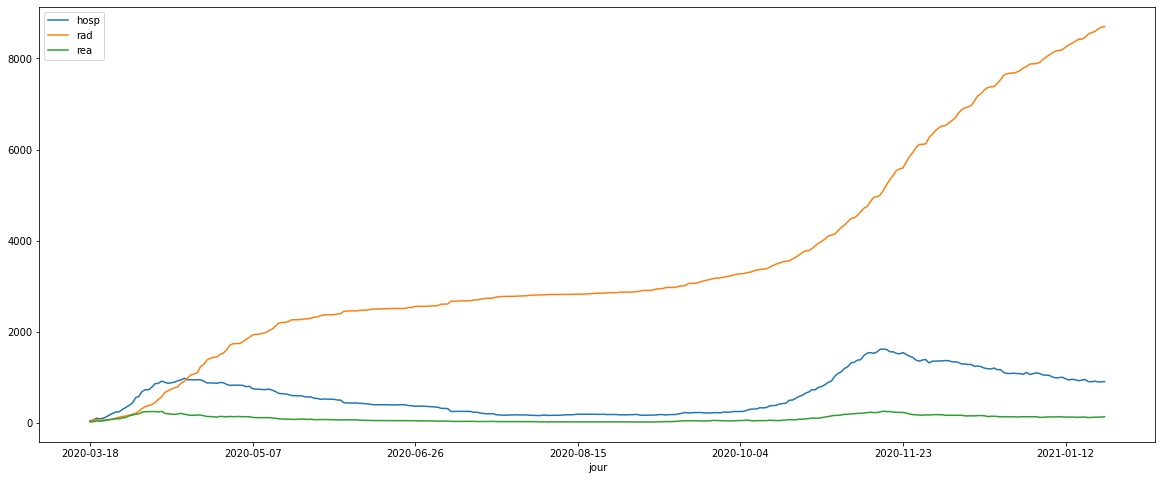

In [52]:
pandas_covid.plot(figsize=(20,8))